In [16]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [8]:
vot = pd.read_csv('data/vots.csv')
vot.head()

,language,gender,height,closure,vot,pclo,tclo,kclo,pvot,tvot,kvot
0,English,Female,162.50,0.022967,0.088828,0.022,0.0207,0.0262,0.086985,0.087877,0.091621
1,English,Male,177.00,0.050667,0.054667,0.081,0.0320,0.0390,0.072000,0.049000,0.043000
2,English,Female,170.18,0.070000,0.166667,0.070,0.0700,0.0700,0.150000,0.230000,0.120000
3,English,Male,178.00,0.039667,0.145667,0.034,0.0560,0.0290,0.170000,0.190000,0.077000
4,English,Female,177.80,0.100333,0.154000,0.144,0.0940,0.0630,0.132000,0.153000,0.177000


Types of plots:

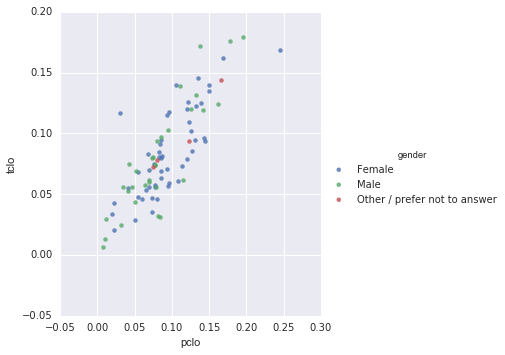

In [28]:
sns.lmplot('pclo', 'tclo', data=vot, fit_reg=False, hue="gender")

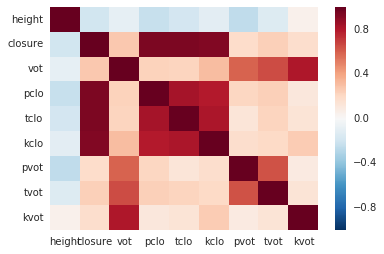

In [20]:
sns.heatmap(vot.corr())

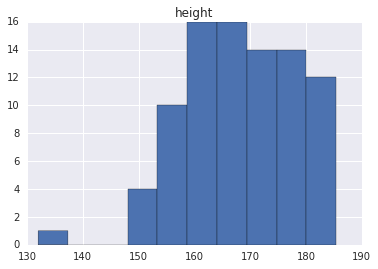

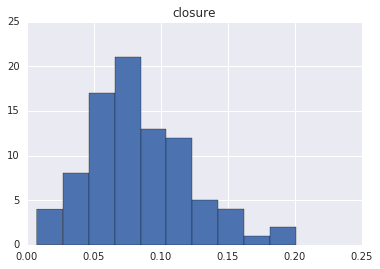

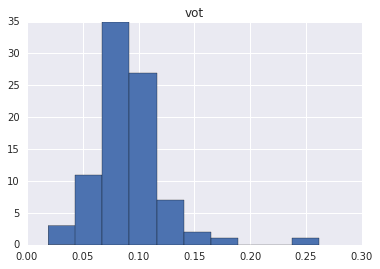

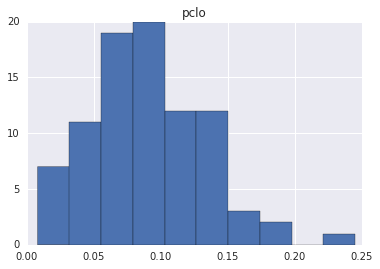

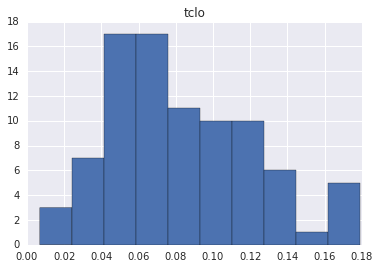

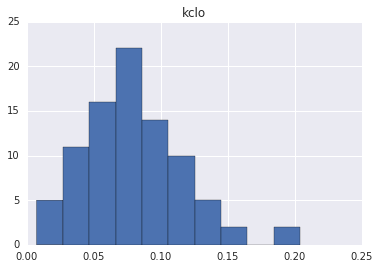

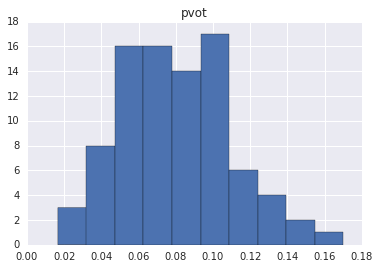

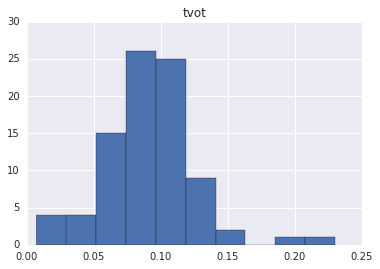

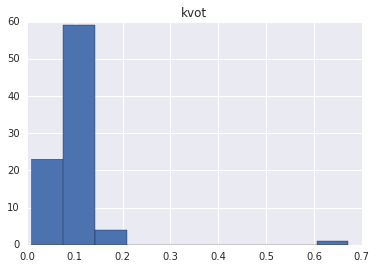

In [21]:
for column in vot.columns[2:]:
    vot.hist(column)